In [1]:
## Libraries
import numpy as np
import matplotlib.pyplot as plt


## Plot settings
plt.rc('xtick', direction='in', labelsize=14)
plt.rc('ytick', direction='in', labelsize=14)
plt.rc('axes', labelsize=20, titlesize=22)
plt.rc('legend', fontsize=14)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['mathtext.fontset'] = 'cm'

In [2]:
## Read coordinates and indices

grid_coordinates = []
with open('../../Grids/Pe_grid.txt', 'r') as reader:
    line = reader.readline()

    while line != '':
        elements = line.split(',')
        point = (float(elements[0]),float(elements[1]))
        grid_coordinates.append(point)
        line = reader.readline()

jump_coordinates = []
with open('../../Grids/Pe_jump_coordinates.txt', 'r') as reader:
    line = reader.readline()

    while line != '':
        elements = line.split(' ')
        data_block = []
        for ele in elements:
            temp = ele.replace('(', '').replace(')', '')
            if temp != 'stop':
                x = temp.split(',')[0]
                y = temp.split(',')[1]
                point = (float(x),float(y))
                data_block.append(point)
            else:
                break
        line = reader.readline()
        jump_coordinates.append(data_block)

jump_indices = []
with open('../../Grids/Pe_jump_indices.txt', 'r') as reader:
    line = reader.readline()

    while line != '':
        elements = line.split(' ')
        data_block = []
        for ele in elements:
            if ele != 'stop':
                data_block.append(int(ele))
            else:
                break
        line = reader.readline()
        jump_indices.append(data_block)


# For drawing vertices use grid_coordinates
# For drawing lines use jump_coordinates
# For indices use jump_indices

In [3]:
## We now want to scale down the plot so it will fit inside a unit square in the 1st quadrant

# Compare x and y components seperatly to for the maximal distances along each axis
xs = [x for x,y in grid_coordinates]
ys = [y for x,y in grid_coordinates]

xs_length = abs(max(xs)) + abs(min(xs))
ys_length = abs(max(ys)) + abs(min(ys))

# We can now scale all xs and ys to fit inside a unit square
xs_scaled = [i/xs_length for i in xs]
ys_scaled = [i/ys_length for i in ys]
grid_scaled = [(x,y) for x, y in zip(xs_scaled, ys_scaled)]

# Same thing for all jump coodinates
jump_scaled = []
for i in jump_coordinates:
    xs_temp = [j[0]/xs_length for j in i]
    ys_temp = [j[1]/ys_length for j in i]
    jump_temp = [(x,y) for x, y in zip(xs_temp, ys_temp)]
    jump_scaled.append(jump_temp)


# The new vertices are stored in grid_scaled
# The new jumps are stored in jump_scaled


## Now we want to move the grid so it lies in the first quadrant 

# We check how much it should be moved along postive x axis and y axis
x_move = min(xs_scaled)
y_move = min(ys_scaled)

# Add the absolute to every coordinate
xs_final = [x + abs(x_move) for x in xs_scaled]
ys_final = [y + abs(y_move) for y in ys_scaled]
grid_final = [(x,y) for x, y in zip(xs_final, ys_final)]

jump_final = []
for i in jump_scaled:
    xs_temp = [j[0] + abs(x_move) for j in i]
    ys_temp = [j[1] + abs(y_move) for j in i]
    jump_temp = [(x,y) for x, y in zip(xs_temp, ys_temp)]
    jump_final.append(jump_temp)


# The new vertices are stored in grid_final
# The new jumps are stored in jump_final

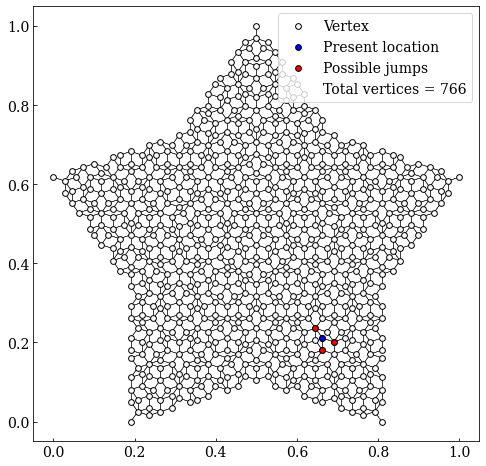

In [4]:
# Define figure
fig, ax = plt.subplots(figsize=(8,8))

# Plot all possible paths between vertices
for i,j in zip(grid_final, jump_final):
    xs = [w[0] for w in j]
    ys = [w[1] for w in j]
    for l,k in zip(xs,ys):
        ax.plot([i[0], l], [i[1], k], color= 'k', zorder= 1, linewidth= 0.5)


# Choose index to highlight a specific vertex and its connecting points
#ind_choice = int(len(z)*0.33)
ind_choice = 340

xs_jumps = [w[0] for w in jump_final[ind_choice]]
ys_jumps = [w[1] for w in jump_final[ind_choice]]

marker_size = 33

ax.scatter(x= xs_final, y= ys_final, s= marker_size, facecolor= 'w', edgecolor= 'k', label= "Vertex", linewidth= 1)
ax.scatter(x= xs_final[ind_choice], y= ys_final[ind_choice], s= marker_size, facecolor= 'b', edgecolor= 'k', label= "Present location", linewidth= 1)
ax.scatter(x= xs_jumps, y= ys_jumps, s= marker_size, facecolor= 'r', edgecolor= 'k', label= "Possible jumps", linewidth= 1)
ax.plot([],[], linestyle= '', label= "Total vertices = {}".format(len(grid_coordinates)))

ax.legend(loc= 1)

# IF YOU WANT TO SAVE IT. NAME IS IDENTICAL TO THAT OF OTHER AB TILING FILE
#plt.savefig('../Illustrations/hofstadter_AB_tiling.png')
plt.show()